In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

# ___Estimating Population Means with Confidence___
------------------

In [7]:
!dir ..\data

 Volume in drive D has no label.
 Volume Serial Number is 3A29-3F7E

 Directory of D:\Inferential-Statistical-Analysis-with-Python\data

08/06/2023  07:47 pm    <DIR>          .
01/06/2023  05:37 am    <DIR>          ..
20/05/2023  04:03 pm               866 Cartwheeldata.csv
07/06/2023  04:33 pm            17,906 CommonCLZvalues.png
01/06/2023  06:34 am         2,581,551 EV_Population_Data.csv
20/05/2023  04:03 pm             2,831 nap_no_nap.csv
20/05/2023  04:03 pm           762,373 nhanes_2015_2016.csv
06/06/2023  04:56 pm         7,224,973 USDA_plants_database.csv
               6 File(s)     10,590,500 bytes
               2 Dir(s)  148,181,811,200 bytes free


In [15]:
metro = pd.read_csv("../data/MetroPT3(AirCompressor).csv")          # .drop(["TP2", "TP3", "H1"], axis = 1)
# metro.to_csv("../data/MetroPT3(AirCompressor).csv", index = False)

In [17]:
metro

,DV_pressure,Reservoirs,Oil_temperature,Motor_current
0,-0.024,9.358,53.600,0.0400
1,-0.022,9.348,53.675,0.0400
2,-0.022,9.338,53.600,0.0425
3,-0.022,9.328,53.425,0.0400
4,-0.022,9.318,53.475,0.0400
...,...,...,...,...
999994,-0.022,9.044,66.325,0.0425
999995,-0.022,9.024,65.750,0.0400
999996,-0.022,9.008,65.450,0.0425
999997,-0.022,8.980,65.125,0.0425


In [18]:
metro.shape

(999999, 4)

In [20]:
# Mean oil temperature (population)

pop_mean = metro.Oil_temperature.mean()
pop_mean

60.91453961453962

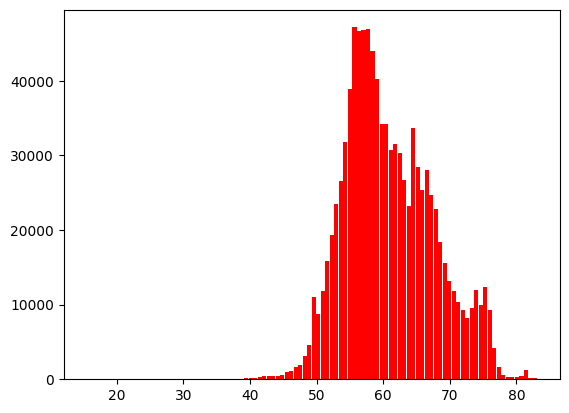

In [21]:
fig, axes = plt.subplots()
axes.hist(metro.Oil_temperature, bins = 100, rwidth = 0.9, color = "red")
plt.show()

In [22]:
metro.Oil_temperature.min(), metro.Oil_temperature.median(), metro.Oil_temperature.max()

(15.400000000000006, 59.87499999999999, 83.125)

In [23]:
quantiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1]
quant_vals = np.quantile(metro.Oil_temperature, q = quantiles)
bins = [(metro.Oil_temperature <= qval).sum() for qval in quant_vals]

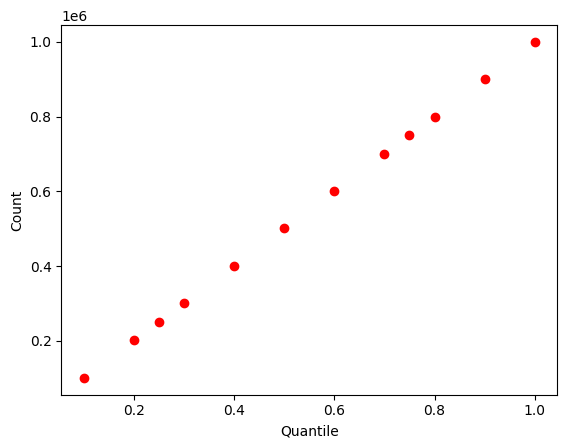

In [24]:
fig, axes = plt.subplots()
axes.scatter(quantiles, bins, color = "red")
axes.set_xlabel("Quantile")
axes.set_ylabel("Count")
plt.show()

In [25]:
metro.Oil_temperature.describe()

count    999999.000000
mean         60.914540
std           6.738249
min          15.400000
25%          56.000000
50%          59.875000
75%          65.525000
max          83.125000
Name: Oil_temperature, dtype: float64

In [26]:
# Lets make a sample of size 10,000

sample = metro.Oil_temperature[np.random.randint(0, metro.Oil_temperature.size, size = 1000)]
sample.mean()

60.68375

In [27]:
pop_mean

60.91453961453962

In [28]:
print(f"Sample size as a fraction of population size: {1000 / metro.Oil_temperature.size}")

Sample size as a fraction of population size: 0.001000001000001


In [29]:
# Distribution of the sample means. => 10,000 samples of size 1,000

smeans = []
for _ in range(10000):
    smeans.append(metro.Oil_temperature[np.random.randint(0, metro.Oil_temperature.size, size = 1000)].mean())

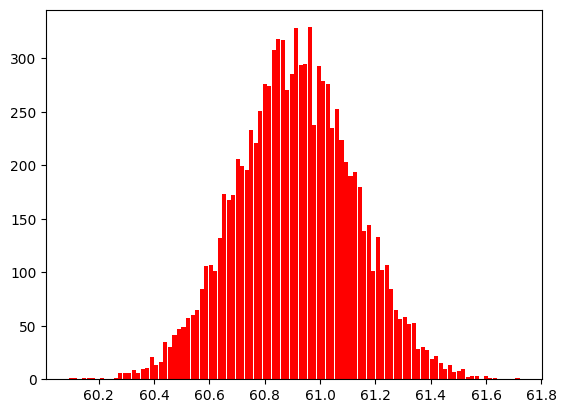

In [30]:
fig, axes = plt.subplots()
axes.hist(smeans, bins = 100, rwidth = 0.9, color = "red")
plt.show()

In [31]:
# Even if the population is skewed (either right or left skewed, the distrbution of the sample metric (mean) needs to be normal)
# To ensure this, we must make sure that our samples are large enough.

# Sample sizes for skewed populations need to be larger compared to samples taken from normal populations.

In [32]:
# Expect a right skewed distribution

skewed_pop = np.random.randint(0, 100, size = 100)
skewed_pop = np.append(skewed_pop, np.random.randint(0, 20, size = 100))

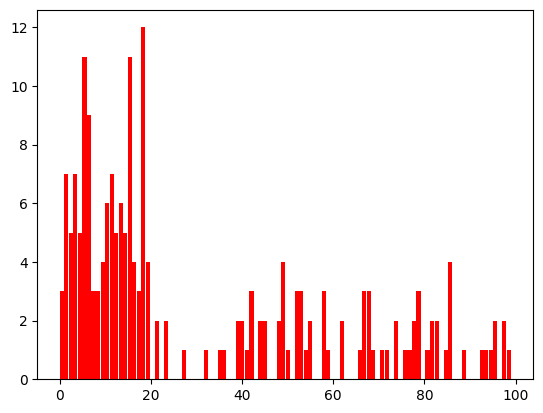

In [33]:
fig, axes = plt.subplots()
axes.hist(skewed_pop, bins = 100, rwidth = 0.9, color = "red")
plt.show()

In [34]:
skew_means = []

for _ in range(1000):
    skew_means.append(np.random.choice(skewed_pop, size = 20).mean())

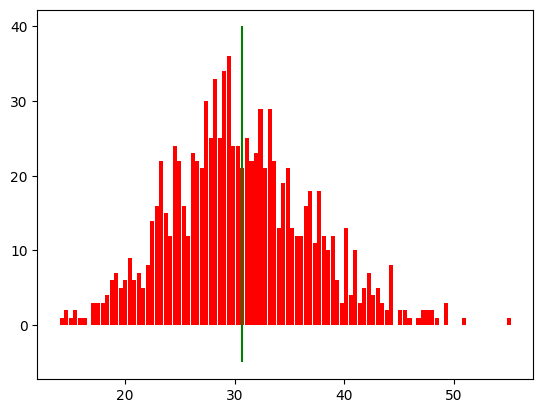

In [35]:
# We still get a bell shaped curve.

fig, axes = plt.subplots()
axes.hist(skew_means, bins = 100, rwidth = 0.9, color = "red")
axes.vlines(x = skewed_pop.mean(), ymin = -5, ymax = 40, color = "green")
plt.show()

In [36]:
# Population mean 

pop_mean = metro.Oil_temperature.mean()
pop_mean

60.91453961453962

In [37]:
# Sample mean (a random sample of 10,000)

sample = metro.Oil_temperature[np.random.randint(0, metro.Oil_temperature.size, size = 10000)]
sample_mean = sample.mean()
sample_mean

60.94741750000001

In [38]:
# However, the sample mean will vary with each sample.
# The value won't be consistent throughout all the sampling attempts.

# ___$Standard~error~of~\mu = \frac{\sigma}{\sqrt{n}}$___

In [39]:
# sigma => standard deviation of population (POPULATION not sample)
# n => sample size
# mu => sample mean

In [40]:
# The larger the sample size, the smaller the standard error will be.
# The problem with this approach is that we could never calculate the population's standard deviation (at least in real world settings)
# We need the mean of population to compute the population's standard deviation.
# If we already have the population's mean, why bother measuring it again with samples, with less accuracy.

In [41]:
# However, we sure can measure the standard deviation of our sample => s

# ___$Estimated~standard~error~of~\mu = \frac{S}{\sqrt{n}}$___

In [42]:
evaluate_stderr = lambda sample: sample.std() / np.sqrt(sample.size)

In [43]:
stderr_est = sample.std() / np.sqrt(10_000)
stderr_est

0.0678106599686208

In [44]:
evaluate_stderr(sample)

0.0678106599686208

In [45]:
# However, we cannot use the same multiplier in statistics related to means.
# Z multipliers are reserved for sample proportions.
# Multipliers used for sample means must be derived from t distribution, not from normal distribution.
# This t value comes from a t distribution with n - 1 degrees of freedom. (where n is the sample size)

# @ 95% confidence interval, 5% significance
# t = 2.064 for n = 25
# t = 1.962 for n = 1000

In [46]:
# Confidence interval = best estimate +- margin of error @ 95% confidence or 5% significance.

moerr = 1.96 * stderr_est
sample_mean - moerr, sample_mean + moerr

(60.81450860646151, 61.080326393538506)

In [65]:
t.ppf(0.95, loc = sample.mean(), scale = sample.std(), df = 999)

72.11163127828071

In [47]:
# Does the confidence interval enclose the true population mean?

pop_mean

60.91453961453962